#  Dimensionality Reduction and Visualization

Example from sklearn documentation.
Dimensionality reduction is the task of deriving a set of new
artificial features that is smaller than the original feature
set while retaining most of the variance of the original data.
Here we'll use a common but powerful dimensionality reduction
technique called Principal Component Analysis (PCA).
We perform dimensionality reduction using first the singular value decomposition of the centered matrix and after the one computed by the PCA subroutine of sklearn.
We work on the iris dataset:

In [39]:
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
%pylab inline
# we plot the dataset composed on 3 column using a three dimensional space
US = np.copy(X)

Populating the interactive namespace from numpy and matplotlib


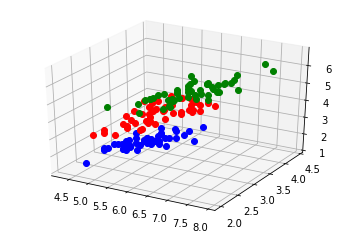

In [40]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
target=iris.target
ax = fig.gca(projection='3d')
ax.plot(US[target==0,0],US[target==0,1],US[target==0,2],'bo')
ax.plot(US[target==1,0],US[target==1,1],US[target==1,2],'ro')
ax.plot(US[target==2,0],US[target==2,1],US[target==2,2],'go')

PCA is performed using linear combinations of the original features
using a  Singular Value Decomposition of the matrix X so
as to project the data onto a base of the top singular vectors.
If the number of retained components is 2 or 3, PCA can be used
to visualize the dataset:

In [51]:
from sklearn.decomposition import PCA
whiten=True
ncomp=2
pca = PCA(copy=True,n_components=ncomp,whiten=whiten).fit(X)
# copy = True la matrice X non viene sovrascritta
# n_components = numero di valori singolari calcolati nella SVD 
# withen = TRUE  le componenti vengono scalate in modo da avere varianza unitaria

Once fitted, the pca model exposes the singular vectors in the components_ attribute:

In [52]:
# direction of maximal variance are the vectors of the matrix V of SVD
# this are the rows of V^T
pca.components_                           

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Let us project the iris dataset along those first two dimensions:

In [53]:
X_pca = pca.transform(X)

Let us compare this results with the singular value decomposition results

In [54]:
import scipy.linalg as la
AS = np.copy(np.asarray(X))
(nb, na) = AS.shape

meanAS=np.mean(AS,axis=0).reshape(1,na)

print('mean of the columns',meanAS)

mean of the columns [[5.84333333 3.05733333 3.758      1.19933333]]


In [55]:
# subtract the mean 
e = np.ones((nb,1))  
AS = AS - np.dot(e,meanAS)
print('mean of the columns after ', np.mean(AS,axis=0)) 

mean of the columns after  [-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


In [56]:
# compute the SVD
U, s, Vh = la.svd(AS,full_matrices=False)

US=np.copy(U)
if whiten:
 US = US[:,0:ncomp]*s[0:ncomp]
 stdUS = np.std(US,axis=0,ddof=1) # the standard deviation is computed by dividing by sqrt(N-ddof)
 US = US/stdUS
else:
 US = US[:,0:ncomp]*s[0:ncomp]

print('Vh')
print(Vh[0:2,:])

print('pca_components')
print(pca.components_)

print('X_pca ratio  with  U_i*s_i')
print( np.max(abs(X_pca/(US[:,0:ncomp]))))


Vh
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]]
pca_components
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
X_pca ratio  with  U_i*s_i
1.0000000000000073


Using withen=True we have performed a standarditazion of the dataset, which means that the data are now centered  with unit variance:

In [61]:
import numpy as np
X_pca.mean(axis=0)

array([-1.39444012e-15, -1.78153788e-15])

In [62]:
np.round(X_pca.std(axis=0,ddof=1), decimals=15)

array([1., 1.])

Furthermore the samples components do no longer carry any linear correlation, the correlation matrix is the identity matrix:

In [63]:
np.round(np.corrcoef(X_pca.T), decimals=5)

array([[1., 0.],
       [0., 1.]])

In thi example the covariance matrix is equal to the correlation matrix

In [67]:
np.round(np.cov(X_pca.T), decimals=5)

array([[1., 0.],
       [0., 1.]])

The means of the columns is 0

In [11]:
np.mean(X_pca,axis=0)

array([-1.39444012e-15, -1.78153788e-15])

In [69]:
np.round((X_pca.T.dot(X_pca))/(nb-1), decimals=5)

array([[1., 0.],
       [0., 1.]])

Now we can visualize the results using the following utility function:

In [71]:
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    figure()
    for i, c, label in zip(target_ids, colors, target_names):
          scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    legend()

Now calling this function for our data, we see the plot:

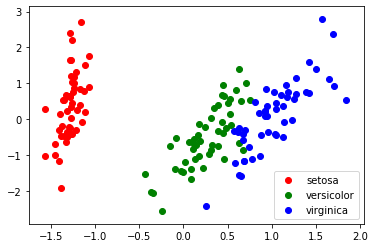

In [72]:
plot_PCA_2D(X_pca, iris.target, iris.target_names)

Note that this projection was determined *without* any information about the
labels (represented by the colors): this is the sense in which the learning
is unsupervised.  Nevertheless, we see that the projection gives us insight
into the distribution of the different flowers in parameter space: notably,
*iris setosa* is much more distinct than the other two species.

Note also that the default implementation of PCA computes the SVD of the full
data matrix, which is not scalable when both ``n_samples`` and
``n_features`` are big (more that a few thousands).
If you are interested in a number of components that is much
smaller than both ``n_samples`` and ``n_features``, consider using
 special solvers for svd 'arpack' or 'randomized'.

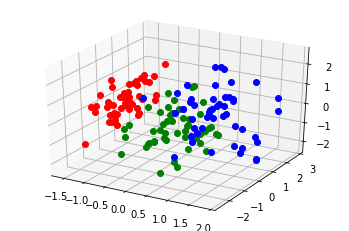

In [74]:
pca = PCA(copy=True,n_components=3, whiten=True,svd_solver='randomized').fit(X)
US = pca.transform(X)
from mpl_toolkits.mplot3d import Axes3D
target=iris.target
fig = figure()
ax = fig.gca(projection='3d')
ax.plot(US[target==0,0],US[target==0,1],US[target==0,2],'ro')
ax.plot(US[target==1,0],US[target==1,1],US[target==1,2],'go')
ax.plot(US[target==2,0],US[target==2,1],US[target==2,2],'bo')


### Exercise:

Repeat the above dimensionality reduction with
``Randomized`` or "arpack".

You can re-use the ``plot_PCA_2D`` function from above.
Are the results similar to those from standard PCA?

In [140]:
pca = PCA(copy=True,n_components=3, whiten=True,svd_solver='randomized').fit(X)
#apply randomized PCA to the iris data as above, and plot the result.

Check the projection on columns

In [93]:
Asat=np.dot(U[:,0:4].T,AS)

the observed values are reconstructed by adding the mean

In [94]:
Xappr = np.dot(U[:,0:4],Asat) + np.dot(e,meanAS)

In [96]:
np.linalg.norm(Xappr-X,2)

1.1248019008855766e-14